In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis

#### Correlations between the supply time series in the pre-period.

1. Pearson Correlation

In [3]:
df = pd.read_csv('../data/comp_price.csv')
df = df.drop('date.1', axis =1)
df = df.drop('date', axis =1)

# df.iloc[:132]

In [4]:
# df.iloc[:141]

In [5]:
def pearson_corr(idx,dt,var):

    pre_df = df.iloc[:idx]
    overall_pearson_r = pre_df.corr().iloc[0,1]
    print(f"Pandas computed Pearson r up to {dt}: {overall_pearson_r}")


    r, p = stats.pearsonr(pre_df.dropna()[f"Portland_{var}"], pre_df.dropna()[f"SF_{var}"])
    print(f"Scipy computed Pearson r: {r} and p-value: {p}")


    # Compute rolling window synchrony
    f,ax=plt.subplots(figsize=(12,4))
    pre_df.rolling(window=4,center=True).mean().plot(ax=ax)
    ax.set(xlabel='Time',ylabel='Pearson r')
    ax.set(title=f"Pearson Correlation of Prices up to {dt} r = {np.round(overall_pearson_r,2)}");

Pandas computed Pearson r up to 2017-10-29: 0.689303909073568
Scipy computed Pearson r: 0.6893039090735681 and p-value: 4.517683536973997e-19


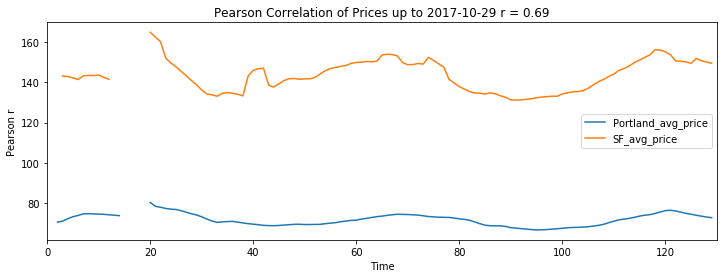

In [6]:
pearson_corr(131,'2017-10-29','avg_price')

Pandas computed Pearson r up to 2018-01-14: 0.6750300861223838
Scipy computed Pearson r: 0.6750300861223839 and p-value: 2.030135441463852e-19


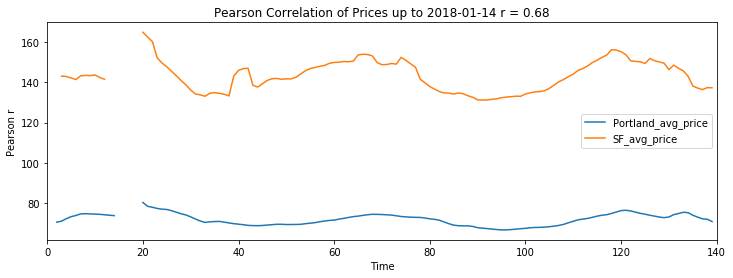

In [7]:
pearson_corr(141,'2018-01-14','avg_price')

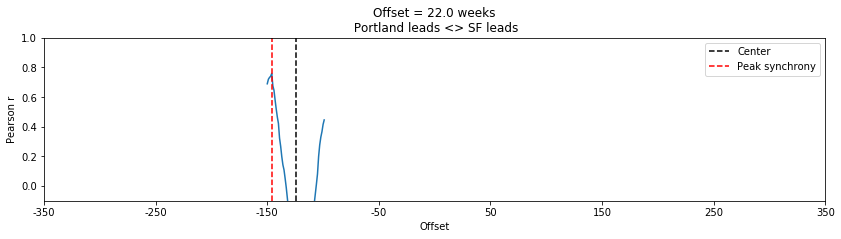

In [8]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    
    
    
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

pre_df = df[:131]
d1 = pre_df['Portland_avg_price']
d2 = pre_df['SF_avg_price']



rs = [crosscorr(d1,d2, lag) for lag in range(52)]
offset = np.ceil(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} weeks\n Portland leads <> SF leads',ylim=[-.1,1],xlim=[-200,500], xlabel='Offset',ylabel='Pearson r')
ax.set_xticklabels([int(item-150) for item in ax.get_xticks()])
plt.legend()

In [9]:
# https://dtaidistance.readthedocs.io/en/latest/usage/dtw.html
from scipy.spatial.distance import euclidean

# from fastdtw import fastdtw

from tslearn.metrics import dtw

comp = pre_df.fillna(method = 'ffill').iloc[1:]

s1 = np.asarray(comp['SF_avg_price'])

s2 = np.asarray(comp['Portland_avg_price'])

dtw(s1,s2)
# d = dtw.distance_fast(s1, s2)

# distance, path = fastdtw(s1, s2, dist=euclidean)
# print(distance)


818.4586721896491

In [10]:
df = pd.read_csv('../data/comp_supply_avail.csv')
df = df.drop('file_scraped_dt.1', axis =1)

df_t = df.set_index(pd.DatetimeIndex(df['file_scraped_dt']))
pre_df = df_t[:'2017-11-13'].resample('M').max()
pre_df = pre_df.drop('file_scraped_dt',axis=1).reset_index().drop('file_scraped_dt',axis=1)
pre_df
# pearson_corr(131,'2017-10-29',"counts")

,Portland_counts,SF_counts
0,806,1521.0
1,0,0.0
2,0,0.0
3,0,0.0
4,887,1766.0
5,0,0.0
6,991,2015.0
7,1012,2076.0
8,1017,0.0
9,1013,2153.0


Pandas computed Pearson r up to 2017-11-30: 0.7822444890924155
Scipy computed Pearson r: 0.7822444890924155 and p-value: 2.0171422385281793e-07


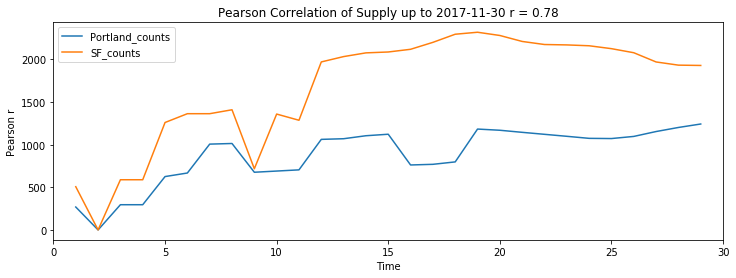

In [11]:
dt = "2017-11-30"
var = "counts"

# pre_df = pre_df.drop('file_scraped_dt', axis =1)
overall_pearson_r = pre_df.corr().iloc[0,1]
print(f"Pandas computed Pearson r up to {dt}: {overall_pearson_r}")


r, p = stats.pearsonr(pre_df.dropna()[f"Portland_{var}"], pre_df.dropna()[f"SF_{var}"])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")


# Compute rolling window synchrony
f,ax=plt.subplots(figsize=(12,4))
pre_df.rolling(window=3,center=True).mean().plot(ax=ax)
ax.set(xlabel='Time',ylabel='Pearson r')
ax.set(title=f"Pearson Correlation of Supply up to {dt} r = {np.round(overall_pearson_r,2)}");

Pandas computed Pearson r up to 2017-11-30: 0.746973648421698
Scipy computed Pearson r: 0.7469736484216979 and p-value: 3.6997175443003856e-40


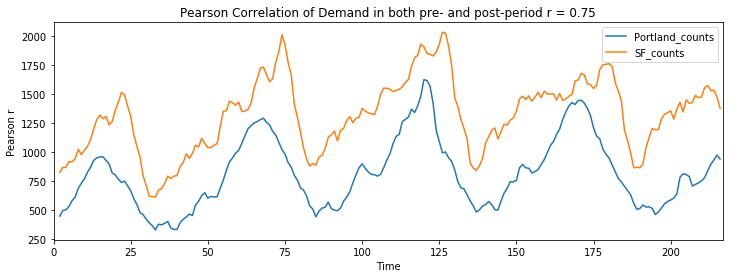

In [14]:
# Include both pre- and post-periods for the demand.

df = pd.read_csv('../data/comp_weekly_demand.csv')
df = df.drop('date', axis =1)
df = df.iloc[:,1:3]
df

overall_pearson_r = df.corr().iloc[0,1]
print(f"Pandas computed Pearson r up to {dt}: {overall_pearson_r}")


r, p = stats.pearsonr(df.dropna()["Portland_counts"], df.dropna()["SF_counts"])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")


# Compute rolling window synchrony
f,ax=plt.subplots(figsize=(12,4))
df.rolling(window=4,center=True).mean().plot(ax=ax)
ax.set(xlabel='Time',ylabel='Pearson r')
ax.set(title=f"Pearson Correlation of Demand in both pre- and post-period r = {np.round(overall_pearson_r,2)}");

Pandas computed Pearson r up to 2017-11-30: 0.6562363735419277
Scipy computed Pearson r: 0.6562363735419277 and p-value: 5.20315309842412e-12


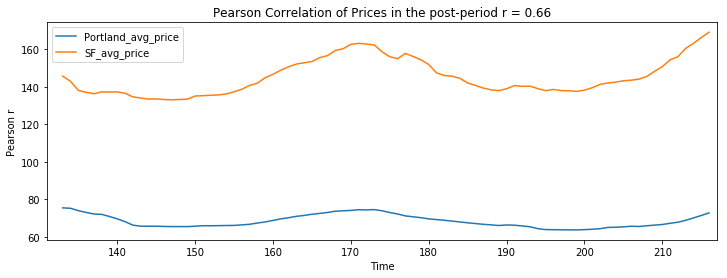

In [17]:
df = pd.read_csv('../data/comp_price.csv')
df = df.drop('date.1', axis =1)
df = df.drop('date', axis =1)

var = "avg_price"

post_df = df.iloc[131:]
overall_pearson_r = post_df.corr().iloc[0,1]
print(f"Pandas computed Pearson r up to {dt}: {overall_pearson_r}")


r, p = stats.pearsonr(post_df.dropna()[f"Portland_{var}"], post_df.dropna()[f"SF_{var}"])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")


# Compute rolling window synchrony
f,ax=plt.subplots(figsize=(12,4))
post_df.rolling(window=4,center=True).mean().plot(ax=ax)
ax.set(xlabel='Time',ylabel='Pearson r')
ax.set(title=f"Pearson Correlation of Prices in the post-period r = {np.round(overall_pearson_r,2)}");